# Data statistics

In [2]:
import random
from tokenizer import get_threads, get_files

files = get_files("./data")
threads = [x for x in get_threads(files)]

In [2]:
num_threads = len(threads)
num_threads

238961

In [3]:
num_posts = sum([len(x) for x in threads])
num_posts

7230424

In [4]:
threads_small = random.sample(threads, num_threads//10)
threads_small = [" ".join(x) for x in threads_small]
len(threads_small)

23896

In [11]:
import numpy as np
import pandas as pd

df = pd.DataFrame({"thread": threads_small})
df

,thread
0,sony a6000 + len kit + len fix 50 1.8 chụp ít ...
1,Dow Jones đang lên 26000 điểm . Mai lại nổ tiế...
2,hồi tháng 5 cũng con này e phải hạ giá xuống 2...
3,chuẩn bị giấy trước chủ tịch xã phường kí tên ...
4,"Phim lịch sử muốn hay, không nhàm chán, thì ph..."
...,...
23891,"lần sau bị thụi thì cứ bóp vếu móc bím nó, nó ..."
23892,"minh bán hết rồi, thank bạn Mình có con i7 970..."
23893,Công nhận là bao giờ nghĩ đến nyc nó cũng là c...
23894,"Thà là tốc chiến nắm lệnh game moblie , để 3 n..."


In [12]:
df["length"] = df["thread"].str.split().str.len()
df

,thread,length
0,sony a6000 + len kit + len fix 50 1.8 chụp ít ...,40
1,Dow Jones đang lên 26000 điểm . Mai lại nổ tiế...,469
2,hồi tháng 5 cũng con này e phải hạ giá xuống 2...,77
3,chuẩn bị giấy trước chủ tịch xã phường kí tên ...,171
4,"Phim lịch sử muốn hay, không nhàm chán, thì ph...",1913
...,...,...
23891,"lần sau bị thụi thì cứ bóp vếu móc bím nó, nó ...",548
23892,"minh bán hết rồi, thank bạn Mình có con i7 970...",69
23893,Công nhận là bao giờ nghĩ đến nyc nó cũng là c...,59
23894,"Thà là tốc chiến nắm lệnh game moblie , để 3 n...",316


In [13]:
df.describe().astype(int)

,length
count,23896
mean,1105
std,6115
min,1
25%,91
50%,343
75%,979
max,620498


<AxesSubplot:ylabel='Frequency'>

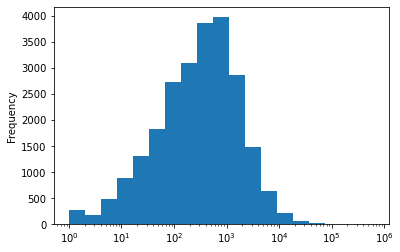

In [32]:
bins = np.logspace(0, np.log10(df["length"].max()), 20)
df["length"].plot.hist(logx=True, bins=bins)

In [39]:
np.percentile(df["length"].to_numpy(), 95)

3911.0

In [9]:
def ngram_counter(texts, ngram=1):
    counter = {}
    
    for item in texts:
        words = item.split()
        for i in range(len(words)+1-ngram):
            x = tuple(words[i:i+ngram])
            if x not in counter:
                counter[x] = 1
            else:
                counter[x] += 1
    
    df = pd.DataFrame({"ngram": counter.keys(), "count": counter.values()})
    df = df.sort_values("count", ascending=False)
    
    return df

In [10]:
unigram = ngram_counter(threads_small)
unigram[:20]

,ngram,count
82,"(có,)",321341
10,"(là,)",311792
44,"(thì,)",297267
55,"(nó,)",165555
27,"(mà,)",165274
188,"(không,)",161674
1,"(cũng,)",159187
258,"(cho,)",154457
607,"(của,)",150025
105,"(này,)",136573


In [11]:
bigram = ngram_counter(threads_small, ngram=2)
bigram[:20]

,ngram,count
168,"(via, for)",34792
624,"(for, iPhone)",31548
1212,"(có, thể)",24910
2391,"(bằng, vozFApp)",19906
4071,"(Gửi, từ)",17877
1692,"(không, có)",14198
2584,"(Sent, from)",13206
2233,"(cũng, có)",10630
3051,"(thời, gian)",10610
3175,"(ko, có)",9979


In [12]:
trigram = ngram_counter(threads_small, ngram=3)
trigram[:20]

,ngram,count
646,"(via, for, iPhone)",31413
104517,"(Đống, Đa,, Hà)",6004
104518,"(Đa,, Hà, Nội)",5985
941843,"(Phạm, Ngọc, Thạch,)",5982
2014691,"(Anh, Chị, Em)",5976
2014709,"(085, 373, 5555)",5972
1447762,"(Em, ủng, hộ)",5972
2014699,"(101, Phạm, Ngọc)",5971
2014705,"(0242, 2133, 136)",5971
2014706,"(2133, 136, -)",5971


# Tokenizer

In [3]:
samples = random.sample(threads, 100)

## Hugging Face tokenizer

In [9]:
from tokenizers import Tokenizer

tokenizer = Tokenizer.from_file("voz_tokenizer.json")
tokenizer.get_vocab_size()

15000

In [10]:
vocab = tokenizer.get_vocab()
vocab = [(v,k) for k,v in vocab.items()]
vocab.sort()
print(vocab[:10])
print(vocab[-10:])

[(0, 'UNK'), (1, '<PAD>'), (2, '<BOS>'), (3, '<EOS>'), (4, '<SEP>'), (5, '!'), (6, '"'), (7, '#'), (8, '$'), (9, '%')]
[(14990, 'B1'), (14991, 'xk'), (14992, 'Gar'), (14993, 'Riết'), (14994, 'amin'), (14995, 'lải'), (14996, 'chiêm'), (14997, '20m'), (14998, 'AIO'), (14999, 'extension')]


In [12]:
sample = samples[1]
sample = " ".join(sample)

output = tokenizer.encode(sample)
restored = tokenizer.decode(output.ids)

print(sample)
print(output.ids)
print(output.tokens)
print(restored)

đề thi thử của trường Vừa mới tốt nghiệp là tranh thủ lên xe bông. Chắc sợ để lâu quá tới năm 28 tuổi lại bị các vozer kêu dẫm kiếm đc mối ngon + kinh tế vững thì cưới thôi fence, đâu có như chúng ta Chuẩn rồi, bố mẹ còn trẻ thì cứ cưới cứ đẻ, vừa nhờ đc kinh tế, vừa nhờ chăm con cho, sướng cái thân. Ổn định vài năm phấn đấu sự nghiệp thôi
[6344, 6557, 6541, 5884, 6231, 8068, 5970, 6283, 6495, 5823, 6675, 6449, 6001, 6077, 9641, 18, 6983, 6558, 5935, 6442, 6061, 6220, 6023, 7872, 6454, 5922, 5982, 5930, 7019, 6770, 11072, 6508, 6120, 7738, 6323, 15, 6332, 6336, 9077, 5837, 7315, 5962, 7446, 16, 6026, 5835, 5857, 6421, 6086, 8350, 5896, 16, 6459, 6238, 5931, 6604, 5837, 6102, 7315, 6102, 7465, 16, 6318, 7028, 6120, 6332, 6336, 16, 6318, 7028, 7418, 5915, 5869, 16, 7342, 5905, 6492, 18, 6539, 6778, 6188, 6413, 6023, 9288, 7054, 6203, 6495, 5962]
['đề', 'thi', 'thử', 'của', 'trường', 'Vừa', 'mới', 'tốt', 'nghiệp', 'là', 'tranh', 'thủ', 'lên', 'xe', 'bông', '.', 'Chắc

In [13]:
num_words = 0
num_tokens = 0

for x in samples:
    x = " ".join(x)
    output = tokenizer.encode(x)
    
    num_words += len(x.split())
    num_tokens += len(output.ids)

print("Number of words:", num_words)
print("Number of tokens:", num_tokens)
print("Ratio:", num_tokens/num_words)

Number of words: 100677
Number of tokens: 117747
Ratio: 1.1695521320659137


## Sentencepiece tokenizer

In [4]:
import sentencepiece as spm

s = spm.SentencePieceProcessor(model_file='voz_out.model')
s.vocab_size()

15000

In [5]:
with open("voz_out.vocab", "r", encoding="utf-8") as f:
    vocab = [x.rstrip().split() for x in f]

print(vocab[:10])
print(vocab[-10:])

[['<unk>', '0'], ['<s>', '0'], ['</s>', '0'], ['<sep>', '0'], ['▁t', '-0'], ['▁c', '-1'], ['ng', '-2'], ['▁n', '-3'], ['▁đ', '-4'], ['▁th', '-5']]
[['📆', '-14986'], ['📰', '-14987'], ['📺', '-14988'], ['🔇', '-14989'], ['🔈', '-14990'], ['🔉', '-14991'], ['🔋', '-14992'], ['🔖', '-14993'], ['🔷', '-14994'], ['🕴', '-14995']]


In [7]:
sample = samples[1]
sample = " ".join(sample)

output = s.encode(sample)
restored = s.decode(output)

print(sample)
print(output)
print([s.IdToPiece(x) for x in output])
print(restored)

đề thi thử của trường Vừa mới tốt nghiệp là tranh thủ lên xe bông. Chắc sợ để lâu quá tới năm 28 tuổi lại bị các vozer kêu dẫm kiếm đc mối ngon + kinh tế vững thì cưới thôi fence, đâu có như chúng ta Chuẩn rồi, bố mẹ còn trẻ thì cứ cưới cứ đẻ, vừa nhờ đc kinh tế, vừa nhờ chăm con cho, sướng cái thân. Ổn định vài năm phấn đấu sự nghiệp thôi
[322, 826, 750, 71, 444, 2370, 164, 493, 704, 25, 887, 641, 197, 321, 4062, 9425, 1203, 767, 123, 651, 246, 426, 213, 2785, 663, 113, 179, 89, 1232, 975, 5649, 721, 317, 2002, 532, 655, 544, 547, 3449, 36, 1554, 149, 1692, 9430, 212, 32, 59, 626, 419, 2675, 85, 9430, 652, 439, 121, 807, 36, 259, 1554, 259, 1706, 9430, 533, 1231, 317, 544, 547, 9430, 533, 1231, 1656, 110, 70, 9430, 1581, 96, 694, 9425, 4066, 9408, 389, 621, 213, 3691, 1276, 406, 704, 149]
['▁đề', '▁thi', '▁thử', '▁của', '▁trường', '▁Vừa', '▁mới', '▁tốt', '▁nghiệp', '▁là', '▁tranh', '▁thủ', '▁lên', '▁xe', '▁bông', '.', '▁Chắc', '▁sợ', '▁để', '▁lâu', '▁quá', '▁tới', '▁năm', '▁28', '▁tuổ

In [8]:
num_words = 0
num_tokens = 0

for x in samples:
    x = " ".join(x)
    output = s.encode(x)
    
    num_words += len(x.split())
    num_tokens += len(output)

print("Number of words:", num_words)
print("Number of tokens:", num_tokens)
print("Ratio:", num_tokens/num_words)

Number of words: 100677
Number of tokens: 119335
Ratio: 1.1853253473981147
